[Download dataset](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset/data?select=london_merged.csv)

- Data Understanding
- Data Cleaning
    * Specifying better collumn names
    * Change the weather_code and season columns to more appropriate values
- Data Exploration and Visualization
    * The distribution of weather code by seasons
    * How many people rent a bike by season?
    * How does weather affect bike usage?
    * What's the total bike rides between specific periods?
    * What's the 2-week moving average? (7-day/ 30-day moving average?)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/london_merged.csv', parse_dates = ['timestamp'])

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

## Data Understanding

In [5]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [7]:
print("Number off Rows:", df.shape[0])
print("Number off Rows:", df.shape[1])

Number off Rows: 17414
Number off Rows: 10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [9]:
df.describe()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911


In [10]:
print("Any Missing Value?",df.isnull().values.any())

Any Missing Value? False


In [11]:
dup = df.duplicated().any()
print("Are there any duplicated value in data?", dup)

Are there any duplicated value in data? False


In [12]:
df.nunique()

timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64

## Data Cleaning

### Specifying better collumn names

In [13]:
df=df.rename(columns={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
})

### Change the weather_code and season columns to more appropriate values

#### Season column

In [14]:
df['season'].value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [15]:
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

df['season'] = df['season'].astype('str').map(season_dict)
df['season'].value_counts()

season
spring    4394
summer    4387
winter    4330
autumn    4303
Name: count, dtype: int64

#### Weather column

In [16]:
df['weather'].value_counts()

weather
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [17]:
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

df['weather'] = df['weather'].astype('str').map(weather_dict)
df['weather'].value_counts()

weather
Clear                     6150
Scattered clouds          4034
Broken clouds             3551
Rain                      2141
Cloudy                    1464
Snowfall                    60
Rain with thunderstorm      14
Name: count, dtype: int64

## Data Exploration and Visualization

In [18]:
df.columns

Index(['time', 'count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent',
       'wind_speed_kph', 'weather', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

### The distribution of weather code by seasons

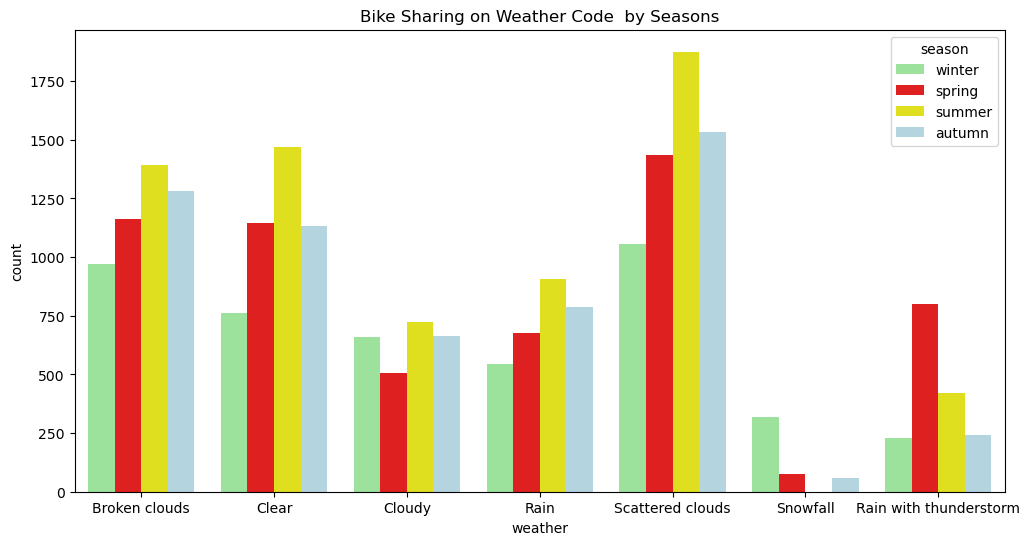

In [19]:
colors_of_seasons = ["lightgreen", "red", "yellow", "lightblue"]
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="weather", y="count", hue="season", palette = colors_of_seasons, errorbar=None)
plt.title("Bike Sharing on Weather Code  by Seasons");

### How many people rent a bike by season?

In [20]:
df['season'].value_counts()

season
spring    4394
summer    4387
winter    4330
autumn    4303
Name: count, dtype: int64

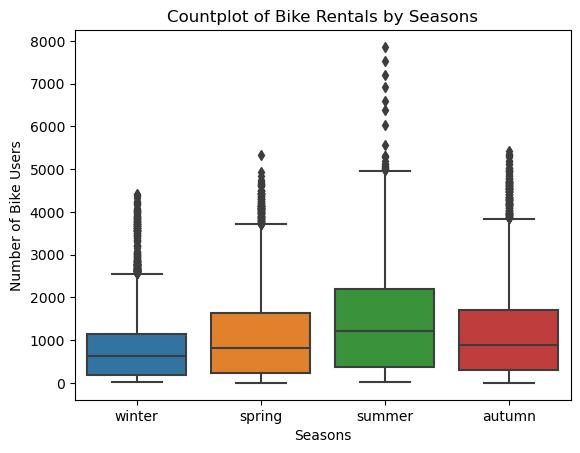

In [21]:
sns.boxplot(x = 'season', y = 'count', data = df)
plt.xlabel('Seasons')
plt.ylabel('Number of Bike Users')
plt.title('Countplot of Bike Rentals by Seasons');

### How does weather affect bike usage?

In [22]:
df['weather'].value_counts()

weather
Clear                     6150
Scattered clouds          4034
Broken clouds             3551
Rain                      2141
Cloudy                    1464
Snowfall                    60
Rain with thunderstorm      14
Name: count, dtype: int64

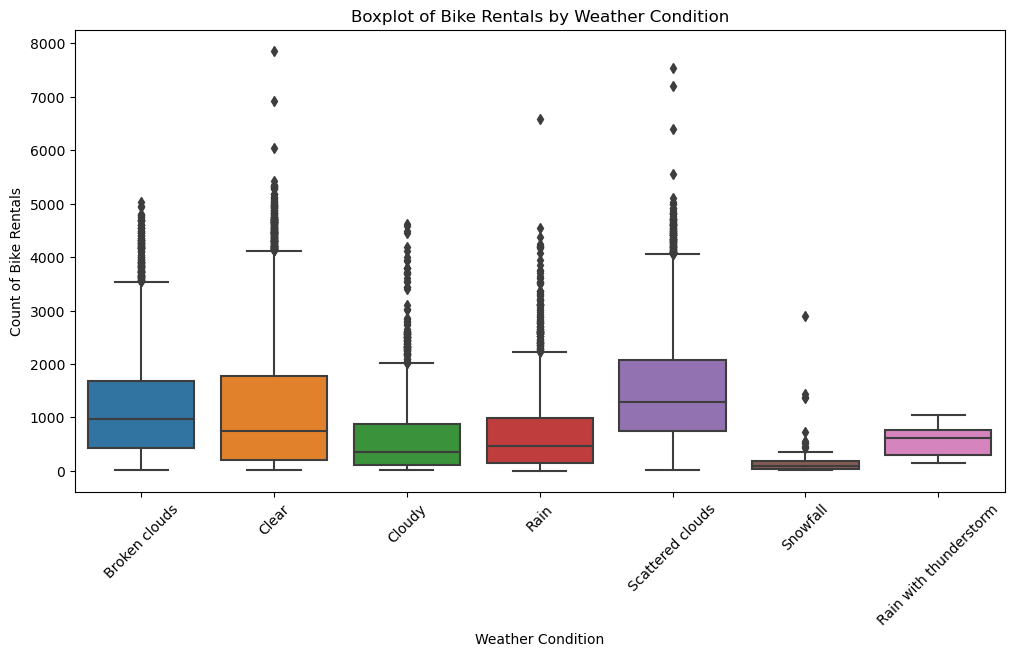

In [23]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'weather', y = 'count', data = df)
plt.title('Boxplot of Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Bike Rentals')
plt.xticks(rotation = 45);

### What's the total bike rides between specific periods?

In [24]:
df.time.value_counts()

time
2015-01-04 00:00:00    1
2016-05-04 12:00:00    1
2016-05-04 18:00:00    1
2016-05-04 17:00:00    1
2016-05-04 16:00:00    1
                      ..
2015-09-03 17:00:00    1
2015-09-03 18:00:00    1
2015-09-03 19:00:00    1
2015-09-03 20:00:00    1
2017-01-03 23:00:00    1
Name: count, Length: 17414, dtype: int64

In [25]:
df['month'] = df['time'].astype('str').apply(lambda x: x[:7]).sort_values()
df['month'].value_counts()

month
2016-01    744
2015-08    744
2016-05    744
2016-12    744
2015-05    744
2016-10    743
2016-07    741
2015-07    740
2016-08    740
2015-12    740
2015-03    739
2015-10    736
2016-03    729
2016-11    719
2015-04    719
2016-04    719
2015-06    717
2015-09    711
2015-11    711
2016-06    705
2016-02    688
2016-09    683
2015-01    671
2015-02    671
2017-01     72
Name: count, dtype: int64

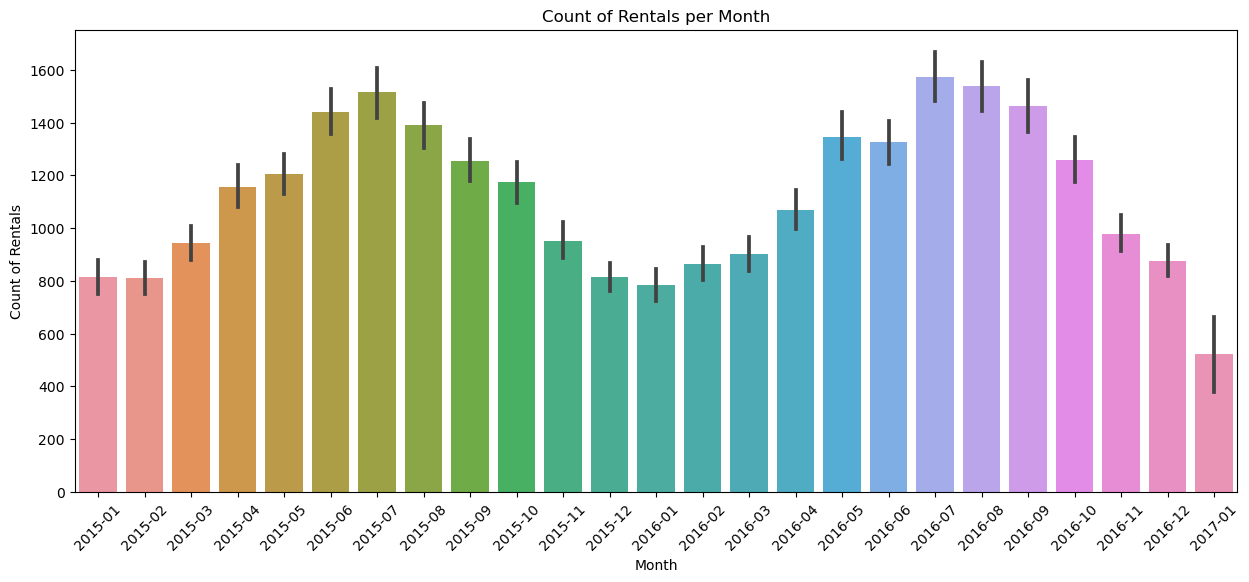

In [26]:
plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='count', data=df)
plt.title('Count of Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Count of Rentals')
plt.xticks(rotation = 45);

### What's the 2-week moving average? (7-day/ 30-day moving average?)

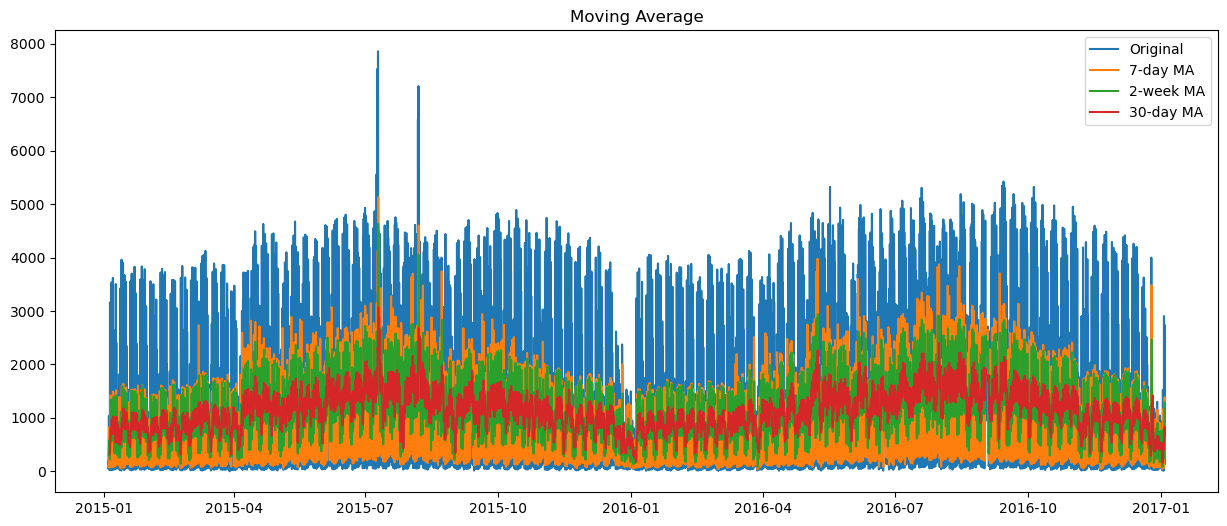

In [28]:
# Sắp xếp DataFrame theo thời gian
df = df.sort_values('time')

# Tính giá trị trung bình di động
df['2_week_ma'] = df['count'].rolling(window=14).mean()
df['7_day_ma'] = df['count'].rolling(window=7).mean()
df['30_day_ma'] = df['count'].rolling(window=30).mean()

# Vẽ biểu đồ
plt.figure(figsize=(15,6))
plt.plot(df['time'], df['count'], label='Original')
plt.plot(df['time'], df['7_day_ma'], label='7-day MA')
plt.plot(df['time'], df['2_week_ma'], label='2-week MA')
plt.plot(df['time'], df['30_day_ma'], label='30-day MA')
plt.legend(loc='best')
plt.title('Moving Average');

## Conclusions

* People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.
* Demand for bicycle hire increases rapidly from March onwards, peaks in July and then starts to decline. The decline in demand accelerates after October, reaching its lowest levels between December and March.
